# Project 19 Restaurant Food Cost Prediction
--> Aim is to predict the food cost of a restuarnt based on the given data

In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [224]:
Rst_trn=pd.read_excel('Resturant_Data_Test.xlsx')

In [225]:
Rst_trn.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [226]:
Rst_tst=pd.read_excel('Resturant_Data_Train.xlsx')

In [227]:
Rst_tst.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [228]:
Rst_trn['DATA']='test'
Rst_tst['DATA']='train'
Rst_trn["COST"]= 0

In [229]:
data=pd.concat([Rst_tst,Rst_trn])

In [230]:
data.shape

(16921, 10)

In [231]:
data.head()

,CITY,COST,CUISINES,DATA,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
0,Thane,1200,"Malwani, Goan, North Indian",train,Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes
1,Chennai,1500,"Asian, Modern Indian, Japanese",train,Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes
2,Chennai,800,"North Indian, Chinese, Biryani, Hyderabadi",train,Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes
3,Mumbai,800,"Tibetan, Chinese",train,Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes
4,Mumbai,300,Desserts,train,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes


In [232]:
data.shape

(16921, 10)

In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 10 columns):
CITY             16774 non-null object
COST             16921 non-null int64
CUISINES         16921 non-null object
DATA             16921 non-null object
LOCALITY         16793 non-null object
RATING           16917 non-null object
RESTAURANT_ID    16921 non-null int64
TIME             16921 non-null object
TITLE            16921 non-null object
VOTES            15315 non-null object
dtypes: int64(2), object(8)
memory usage: 1.4+ MB


In [234]:
data.isnull().sum()

CITY              147
COST                0
CUISINES            0
DATA                0
LOCALITY          128
RATING              4
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES            1606
dtype: int64

In [235]:
data['CITY'].value_counts()

Chennai                  2855
Bangalore                2835
Hyderabad                2458
Mumbai                   2311
New Delhi                1754
                         ... 
Chennai 37                  1
Sector 51 Noida             1
Hyderaba                    1
Near Sector 110 Noida       1
Andheri west Mumbai         1
Name: CITY, Length: 450, dtype: int64

In [236]:
data['VOTES'].unique()

array(['49 votes', '30 votes', '221 votes', ..., '2159 votes',
       '3807 votes', '1913 votes'], dtype=object)

In [237]:
data['VOTES'].fillna('0',inplace=True)

In [238]:
data['VOTES']=data['VOTES'].str.split(' ').str[0].astype(int)

In [239]:
data['VOTES'].unique()

array([  49,   30,  221, ..., 2159, 3807, 1913], dtype=int64)

In [240]:
data['LOCALITY'].value_counts().head()

Gachibowli     216
Indiranagar    187
Kakkanad       175
Kukatpally     171
Madhapur       169
Name: LOCALITY, dtype: int64

In [241]:
data['RATING'].value_counts()

3.9    1643
3.8    1604
4.0    1498
3.7    1437
3.6    1261
4.1    1217
3.5     988
4.2     968
NEW     930
3.4     777
4.3     740
-       672
3.3     485
4.4     484
3.2     349
4.5     274
3.1     263
2.9     242
3.0     229
2.8     191
4.6     184
2.7     129
4.7      90
2.6      85
2.5      51
4.8      49
4.9      28
2.4      24
2.3      15
2.2       4
2.1       4
2.0       2
Name: RATING, dtype: int64

In [242]:
data['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [243]:
data['RATING'].replace('NEW',1,inplace=True)

In [244]:
data['RATING'].replace('-',0,inplace=True)

In [245]:
data['RATING'].fillna(0,inplace=True)

In [246]:
data['RATING']=data['RATING'].astype(float)

In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 10 columns):
CITY             16774 non-null object
COST             16921 non-null int64
CUISINES         16921 non-null object
DATA             16921 non-null object
LOCALITY         16793 non-null object
RATING           16921 non-null float64
RESTAURANT_ID    16921 non-null int64
TIME             16921 non-null object
TITLE            16921 non-null object
VOTES            16921 non-null int32
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 1.4+ MB


In [248]:
data['CITY'].fillna('none',inplace=True)

In [249]:
data['LOCALITY'].fillna('none',inplace=True)

In [250]:
data['LOCALITY'].unique()

array(['Dombivali East', 'Ramapuram', 'Saligramam', ...,
       'Off Carter Road', 'SRM Back Gate', 'Perry Cross Road'],
      dtype=object)

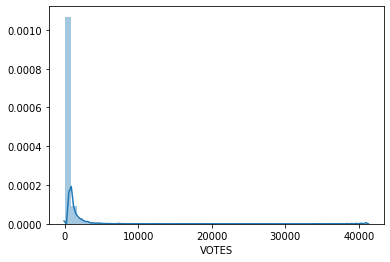

In [251]:
sns.distplot(data['VOTES'])

In [252]:
data['VOTES']=data['VOTES']+5
from scipy.stats import boxcox
data['VOTES']=boxcox(data['VOTES'],0)

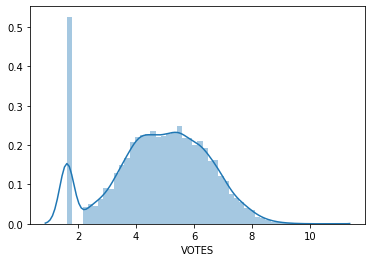

In [253]:
sns.distplot(data['VOTES'])

In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 10 columns):
CITY             16921 non-null object
COST             16921 non-null int64
CUISINES         16921 non-null object
DATA             16921 non-null object
LOCALITY         16921 non-null object
RATING           16921 non-null float64
RESTAURANT_ID    16921 non-null int64
TIME             16921 non-null object
TITLE            16921 non-null object
VOTES            16921 non-null float64
dtypes: float64(2), int64(2), object(6)
memory usage: 1.4+ MB


In [255]:
data['CUISINES'].unique()

array(['Malwani, Goan, North Indian', 'Asian, Modern Indian, Japanese',
       'North Indian, Chinese, Biryani, Hyderabadi', ...,
       'European, Mediterranean, Italian, Sushi',
       'North Indian, Chinese, Kebab, Juices', 'Sindhi, Street Food'],
      dtype=object)

In [256]:
data['CUISINES1']=data['CUISINES'].str.split(',').str[0]
data['CUISINES2']=data['CUISINES'].str.split(',').str[1]
data['CUISINES3']=data['CUISINES'].str.split(',').str[2]
data['CUISINES4']=data['CUISINES'].str.split(',').str[3]
data['CUISINES5']=data['CUISINES'].str.split(',').str[4]

In [257]:
data['CUISINES2'].fillna('None',inplace=True)
data['CUISINES3'].fillna('None',inplace=True)
data['CUISINES4'].fillna('None',inplace=True)
data['CUISINES5'].fillna('None',inplace=True)

In [258]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['CUISINES1']=le.fit_transform(data['CUISINES1'])
data['CUISINES2']=le.fit_transform(data['CUISINES2'])
data['CUISINES3']=le.fit_transform(data['CUISINES3'])
data['CUISINES4']=le.fit_transform(data['CUISINES4'])
data['CUISINES5']=le.fit_transform(data['CUISINES5'])
data['LOCALITY']=le.fit_transform(data['LOCALITY'])

In [259]:
data.drop(['CUISINES'],axis=1, inplace=True)

In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 14 columns):
CITY             16921 non-null object
COST             16921 non-null int64
DATA             16921 non-null object
LOCALITY         16921 non-null int32
RATING           16921 non-null float64
RESTAURANT_ID    16921 non-null int64
TIME             16921 non-null object
TITLE            16921 non-null object
VOTES            16921 non-null float64
CUISINES1        16921 non-null int32
CUISINES2        16921 non-null int32
CUISINES3        16921 non-null int32
CUISINES4        16921 non-null int32
CUISINES5        16921 non-null int32
dtypes: float64(2), int32(6), int64(2), object(4)
memory usage: 1.5+ MB


In [261]:
data['TITLE'].unique()

array(['CASUAL DINING', 'CASUAL DINING,BAR', 'QUICK BITES',
       'DESSERT PARLOR', 'CAFÉ', 'MICROBREWERY',
       'QUICK BITES,BEVERAGE SHOP', 'CASUAL DINING,IRANI CAFE',
       'BAKERY,QUICK BITES', 'None', 'BAR,CASUAL DINING', 'BAR', 'PUB',
       'BEVERAGE SHOP', 'FINE DINING', 'CAFÉ,QUICK BITES',
       'BEVERAGE SHOP,DESSERT PARLOR', 'SWEET SHOP,QUICK BITES',
       'DESSERT PARLOR,SWEET SHOP', 'BAKERY', 'BAKERY,DESSERT PARLOR',
       'BAR,LOUNGE', 'FOOD COURT', 'LOUNGE',
       'DESSERT PARLOR,BEVERAGE SHOP', 'LOUNGE,CASUAL DINING',
       'FOOD TRUCK', 'QUICK BITES,FOOD COURT', 'SWEET SHOP',
       'BEVERAGE SHOP,FOOD COURT', 'PUB,CASUAL DINING', 'MESS',
       'MICROBREWERY,CASUAL DINING', 'CASUAL DINING,SWEET SHOP', 'KIOSK',
       'QUICK BITES,KIOSK', 'CLUB', 'FINE DINING,BAR',
       'DESSERT PARLOR,QUICK BITES', 'FOOD COURT,QUICK BITES',
       'LOUNGE,CAFÉ', 'BAKERY,CONFECTIONERY', 'CASUAL DINING,CAFÉ',
       'DHABA', 'CAFÉ,DESSERT PARLOR', 'QUICK BITES,DESSERT PARLOR'

In [262]:
data['TITLE'].value_counts()

QUICK BITES                    5634
CASUAL DINING                  4910
None                           1287
CAFÉ                            830
DESSERT PARLOR                  508
                               ... 
MEAT SHOP                         1
CAFÉ,FOOD COURT                   1
BHOJANALYA                        1
BEVERAGE SHOP,CASUAL DINING       1
DESSERT PARLOR,KIOSK              1
Name: TITLE, Length: 123, dtype: int64

In [263]:
data['TITLE1']=data['TITLE'].str.split(',').str[0]
data['TITLE2']=data['TITLE'].str.split(',').str[1]

In [264]:
data['TITLE2'].fillna('None',inplace=True)
data.drop(['TITLE'],axis=1,inplace=True)

In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 15 columns):
CITY             16921 non-null object
COST             16921 non-null int64
DATA             16921 non-null object
LOCALITY         16921 non-null int32
RATING           16921 non-null float64
RESTAURANT_ID    16921 non-null int64
TIME             16921 non-null object
VOTES            16921 non-null float64
CUISINES1        16921 non-null int32
CUISINES2        16921 non-null int32
CUISINES3        16921 non-null int32
CUISINES4        16921 non-null int32
CUISINES5        16921 non-null int32
TITLE1           16921 non-null object
TITLE2           16921 non-null object
dtypes: float64(2), int32(6), int64(2), object(5)
memory usage: 1.7+ MB


In [266]:
data.drop(['TIME'],axis=1,inplace=True)

In [267]:
data.drop(['RESTAURANT_ID'],axis=1,inplace=True)

In [268]:
data['TITLE1']=le.fit_transform(data['TITLE1'])
data['TITLE2']=le.fit_transform(data['TITLE2'])
data['CITY']=le.fit_transform(data['CITY'])

In [269]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 13 columns):
CITY         16921 non-null int32
COST         16921 non-null int64
DATA         16921 non-null object
LOCALITY     16921 non-null int32
RATING       16921 non-null float64
VOTES        16921 non-null float64
CUISINES1    16921 non-null int32
CUISINES2    16921 non-null int32
CUISINES3    16921 non-null int32
CUISINES4    16921 non-null int32
CUISINES5    16921 non-null int32
TITLE1       16921 non-null int32
TITLE2       16921 non-null int32
dtypes: float64(2), int32(9), int64(1), object(1)
memory usage: 1.2+ MB


In [273]:
Trainfinal=data.loc[data['DATA']=='train']
Testfinal=data.loc[data['DATA']=='test']
Trainfinal.drop(['DATA'],axis=1,inplace=True)
Testfinal.drop(['DATA'],axis=1,inplace=True)
Trainfinal.head()

,CITY,COST,LOCALITY,RATING,VOTES,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,TITLE1,TITLE2
0,400,1200,328,3.6,3.988984,61,32,71,89,83,5,16
1,75,1500,1214,4.2,3.555348,6,62,45,89,83,5,1
2,75,800,1272,3.8,5.420535,74,23,14,34,83,5,16
3,277,800,161,4.1,3.367296,102,23,100,89,83,23,16
4,277,300,709,3.8,5.135798,30,100,100,89,83,9,16


In [274]:
Trainfinal['COST']=boxcox(Trainfinal['COST'],0)

In [279]:
x=Trainfinal.drop(['COST'],axis=1)
x.head()

,CITY,LOCALITY,RATING,VOTES,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,TITLE1,TITLE2
0,400,328,3.6,3.988984,61,32,71,89,83,5,16
1,75,1214,4.2,3.555348,6,62,45,89,83,5,1
2,75,1272,3.8,5.420535,74,23,14,34,83,5,16
3,277,161,4.1,3.367296,102,23,100,89,83,23,16
4,277,709,3.8,5.135798,30,100,100,89,83,9,16


In [280]:
xtst=Testfinal.drop(['COST'],axis=1)

In [278]:
y=Trainfinal['COST']
y.head()

0    7.090077
1    7.313220
2    6.684612
3    6.684612
4    5.703782
Name: COST, dtype: float64

In [281]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x,xtst)     

In [282]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=97)

In [283]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8883, 11), (3807, 11), (8883,), (3807,))

In [284]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [285]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
DTR=DecisionTreeRegressor(random_state=97)
KNR=KNeighborsRegressor()
ABR=AdaBoostRegressor(random_state=97)
RFR=RandomForestRegressor(random_state=97)
GBR=GradientBoostingRegressor(random_state=97)

In [286]:
models=[]
models.append(("LinearRegression",LR))
models.append(("Lasso",LA))
models.append(("Ridge",RI))
models.append(("DecisionTreeRegressor",DTR))
models.append(("AdaBoostRegressor",ABR))
models.append(("RandomForestRegressor",RFR))
models.append(("GradientBoostingRegressor",GBR))

In [287]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
MAE=[]
RMSE=[]
for name,model in models:
    print('-------------------------------------',name,'-------------------------------')
    print(model)
    Model.append(name)
    model.fit(x_train,y_train)
    pr=model.predict(x_test)
    r2=r2_score(y_test,pr)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pr)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    mae=mean_absolute_error(y_test,pr)
    print("Mean_Absolute_Error =",mae)
    MAE.append(mae)
    rmse=np.sqrt(mse)
    print("Root_Mean_Squared_Error =",rmse)
    RMSE.append(rmse)
    score= cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

------------------------------------- LinearRegression -------------------------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.3655741292234218
Mean_Squared_Error = 0.33687243372937303
Mean_Absolute_Error = 0.4324345932858083
Root_Mean_Squared_Error = 0.5804071275659638
Cross_Val_Score =  0.35925893287440996


------------------------------------- Lasso -------------------------------
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  -3.5179274142871364e-05
Mean_Squared_Error = 0.5310065370516848
Mean_Absolute_Error = 0.5757283317095263
Root_Mean_Squared_Error = 0.728701953511643
Cross_Val_Score =  -0.0005965290584191152


------------------------------------- Ridge -------------------------------
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize

In [288]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Mean_Absolute_Error' :MAE,'Root_Mean_Squared_Error' :RMSE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Mean_Absolute_Error,Root_Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.365574,0.336872,0.432435,0.580407,0.359259
1,Lasso,-0.000035,0.531007,0.575728,0.728702,-0.000597
2,Ridge,0.365572,0.336873,0.432434,0.580408,0.359259
3,DecisionTreeRegressor,0.413024,0.311677,0.422268,0.558281,0.427924
4,AdaBoostRegressor,0.505054,0.262810,0.393090,0.512650,0.477726
5,RandomForestRegressor,0.673946,0.173131,0.320536,0.416090,0.673527
6,GradientBoostingRegressor,0.682176,0.168760,0.312849,0.410805,0.684711


From the above we can see that GradientBoosting Regressor, and random forest regressor is performing beter than others but befre chosing our best model, lets hypertune our both models.

## HyperTunning

In [289]:
## Gradinet Boosting Regressor
from sklearn.model_selection import GridSearchCV
parameterGBR={
            'n_estimators':[50,100,150,200,250,300], 
            'loss':['ls', 'lad', 'huber', 'quantile'],
            'learning_rate': [0.1,0.05,0.02,0.01],
            'max_depth':[4,3,2], 
            'min_samples_leaf':[3,4,5], 
            'max_features':[1.0] 
            } 
gridGBR = GridSearchCV(GBR, param_grid=parameterGBR, n_jobs=-1, cv=10)
gridGBR.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite...
                             

In [290]:
gridGBR.best_score_ , gridGBR.best_params_

(0.7309768165697728,
 {'learning_rate': 0.1,
  'loss': 'ls',
  'max_depth': 4,
  'max_features': 1.0,
  'min_samples_leaf': 3,
  'n_estimators': 300})

In [291]:
## Random Forest Regressor
from sklearn.model_selection import GridSearchCV
RFRpara={
    "n_estimators"     :[50,100,150,200,250,300,350],
    "max_features"     :["auto","sqrt","log2"],
    "min_samples_split":[2,4,8,10],
    "bootstrap"        :[True,False],
    }
gFR=GridSearchCV(RFR,param_grid=RFRpara,n_jobs=1,cv=10)
gFR.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=97,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=1,
             param_grid={'bootstrap': [True, False],
           

In [292]:
gFR.best_score_ , gFR.best_params_

(0.7023600779686563,
 {'bootstrap': True,
  'max_features': 'auto',
  'min_samples_split': 10,
  'n_estimators': 350})

So From the above we can see that after Hyperparameter tunning we got a beter accuracy score, than default parameters, so we will chose GradientBoosting Regressor as my final model, as we got the accuracy score of 73.

In [300]:
from sklearn.externals import joblib
joblib.dump(gridGBR,'Resturant_Food_Cost_Prediction.obj')

['Resturant_Food_Cost_Prediction.obj']

In [301]:
model=joblib.load('Resturant_Food_Cost_Prediction.obj')

In [302]:
model.predict(x_test)

array([5.59761228, 5.80068438, 5.78817442, ..., 7.16317877, 5.44884385,
       5.88089275])

In [304]:
prediction=model.predict(xtst)

In [305]:
pre = pd.DataFrame(prediction)
pre.columns = ["prediction"]
pre.to_csv("Resturant_Food_Cost_prediction_results.csv")